In [15]:
#Import all the needed libaries to run the program

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
warnings.filterwarnings("ignore", category=UserWarning)

In [29]:
#Reading the data,displaying it 

info = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset is: ', info.shape)
def highlight_table(s):
    return f'background-color: lightgreen; color: black; border: 1px solid black'
styled_info = info.style.applymap(highlight_table)
styled_info.set_table_styles([{'selector': 'table', 'props': [('max-width', '1000px')]}])


Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


In [17]:
#Checking for null values

info.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [18]:
#Summarises Statistics Measures 

summary = info.describe()

def style_summary(summary):
    return summary.style.set_properties(**{
        'background-color': 'lightgreen',
        'color': 'black',
        'border': '1px solid black',
        'font-size': '14px',
        'text-align': 'center'
    }).set_table_attributes('style="font-size: 18px"')

styled_summary = style_summary(summary)
styled_summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


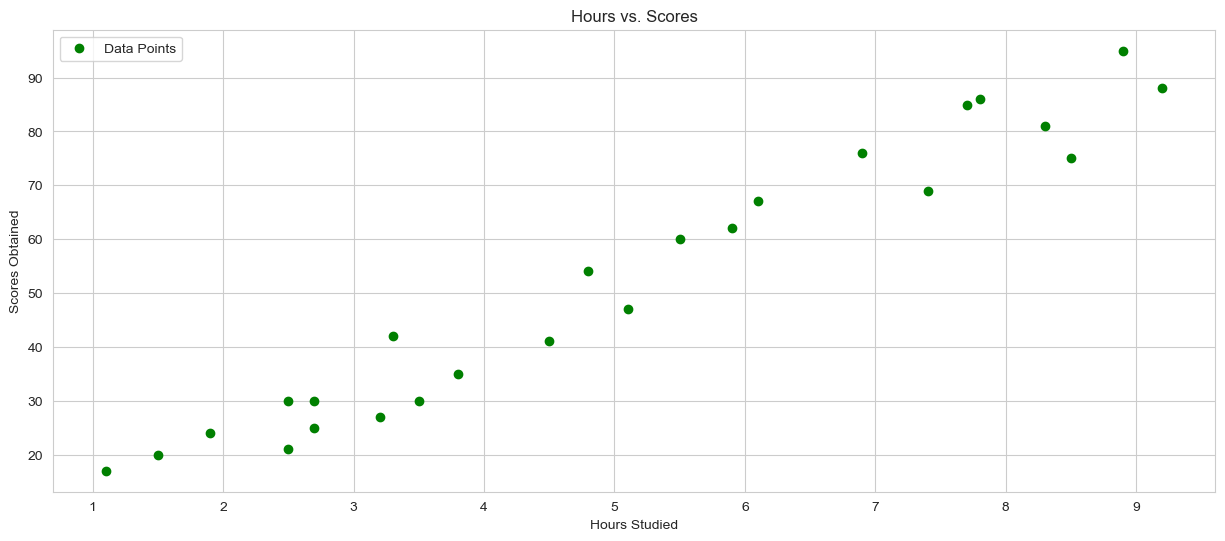

In [20]:
hours = info['Hours']
scores = info['Scores']
plt.figure(figsize=(15, 6))
plt.scatter(hours, scores, c='green', marker='o', label='Data Points')
plt.title('Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
info.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


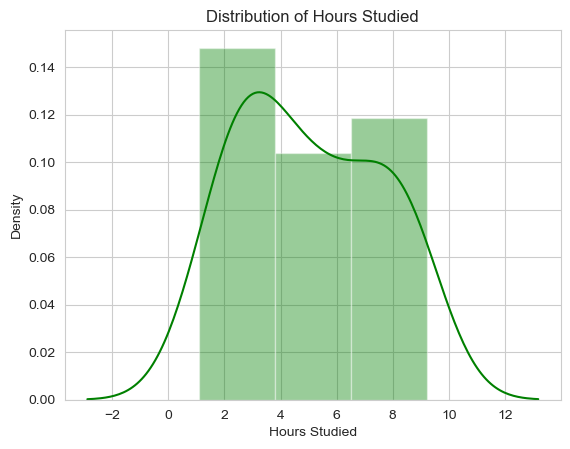

In [22]:
#KDE curve helps in understanding the density of study hours.

hours = info['Hours']
sns.distplot(hours, kde=True, color='green')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Density')
plt.show()

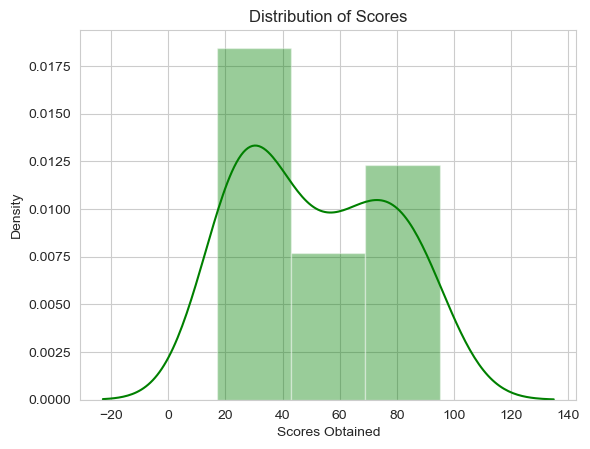

In [23]:
#the KDE curve helps in understanding the density of score values.

scores = info['Scores']
sns.distplot(scores, kde=True, color='green')
plt.title('Distribution of Scores')
plt.xlabel('Scores Obtained')
plt.ylabel('Density')
plt.show()

Mean Squared Error (MSE): 25.58
R-squared (R2) Score: 0.97


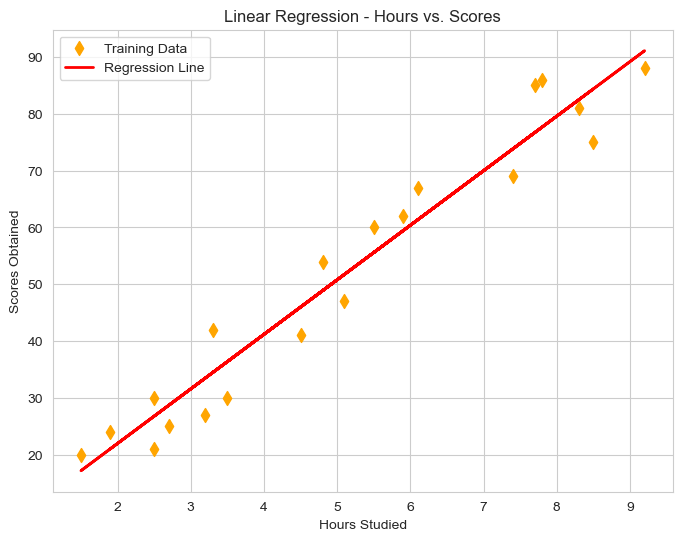

In [24]:
#Linear Regression Analysis - Hours vs. Score

X = info[['Hours']]
y = info['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=50)
model = LinearRegression()
model.fit(X_train, y_train)
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='orange', label='Training Data',marker='d', s=50)
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression - Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.legend()
plt.grid(True)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')
plt.show()

In [25]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


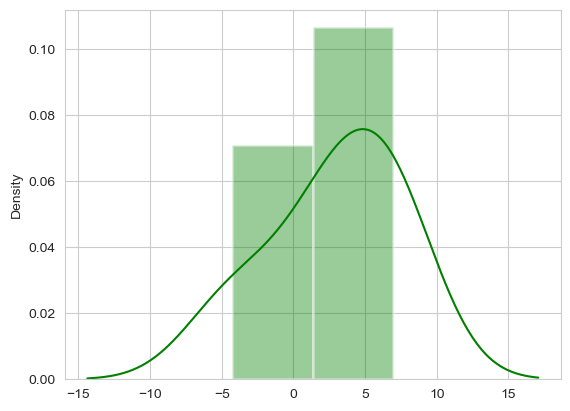

In [26]:
#Residual Analysis - Linear Regression

sns.set_style('whitegrid')
residuals = np.array(y_test - y_pred)
sns.distplot(residuals, color='green', hist_kws={'linewidth': 2})
plt.show()

In [27]:
#Predicting Scores using Linear Regression

model = LinearRegression()
x = info[['Hours']]
y = info['Scores']
model.fit(x,y)
hours = 9.25
own_pred = model.predict([[hours]])
print("If a person studies for {:.2f} Hours, the Predicted score is {:.2f}".format(hours, own_pred[0]))

If a person studies for 9.25 Hours, the Predicted score is 92.91


In [30]:
#Evaluation of Linear Regression Model - Mean Absolute Error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.5916495300630285
